<a href="https://colab.research.google.com/github/privindofdn/UAS_PRAKTIKUM_STRUKTURDATA/blob/main/Graph_G211220081.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install networkx matplotlib


Vertex 	 Distance from Source
0 		 0
1 		 4
2 		 12
3 		 19
4 		 21
5 		 11
6 		 9
7 		 8
8 		 14


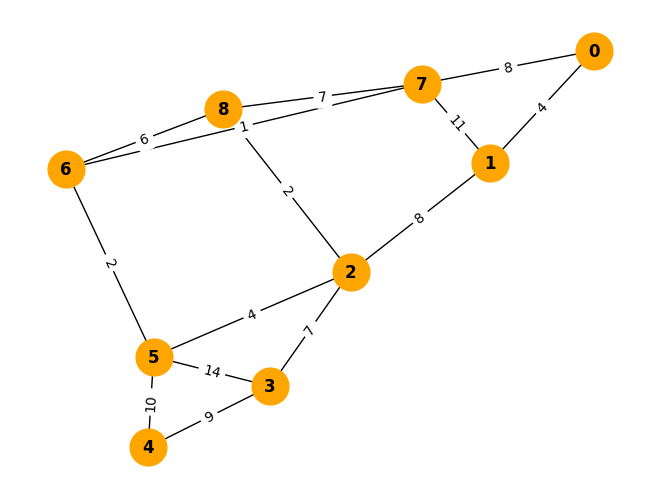

In [28]:
class Graph():

    def __init__(self, vertices):
        self.V = vertices
        self.graph = [[0 for column in range(vertices)]
                      for row in range(vertices)]

    def printSolution(self, dist):
        print("Vertex \t Distance from Source")
        for node in range(self.V):
            print(node, "\t\t", dist[node])

    def minDistance(self, dist, sptSet):
        min = 1e7
        for v in range(self.V):
            if dist[v] < min and sptSet[v] == False:
                min = dist[v]
                min_index = v
        return min_index

    def dijkstra(self, src):
        dist = [1e7] * self.V
        dist[src] = 0
        sptSet = [False] * self.V
        for cout in range(self.V):
            u = self.minDistance(dist, sptSet)
            sptSet[u] = True
            for v in range(self.V):
                if (self.graph[u][v] > 0 and
                   sptSet[v] == False and
                   dist[v] > dist[u] + self.graph[u][v]):
                    dist[v] = dist[u] + self.graph[u][v]
        self.printSolution(dist)

    def visualize(self):
        G = nx.Graph()
        for i in range(self.V):
            G.add_node(i)
            for j in range(self.V):
                if self.graph[i][j] > 0:
                    G.add_edge(i, j, weight=self.graph[i][j])
        pos = nx.spring_layout(G)
        nx.draw(G, pos, with_labels=True, font_weight='bold', node_size=700, node_color='orange')
        edge_labels = nx.get_edge_attributes(G, 'weight')
        nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
        plt.show()

# Driver program
g = Graph(vertices=9)
g.graph = [[0, 4, 0, 0, 0, 0, 0, 8, 0],
           [4, 0, 8, 0, 0, 0, 0, 11, 0],
           [0, 8, 0, 7, 0, 4, 0, 0, 2],
           [0, 0, 7, 0, 9, 14, 0, 0, 0],
           [0, 0, 0, 9, 0, 10, 0, 0, 0],
           [0, 0, 4, 14, 10, 0, 2, 0, 0],
           [0, 0, 0, 0, 0, 2, 0, 1, 6],
           [8, 11, 0, 0, 0, 0, 1, 0, 7],
           [0, 0, 2, 0, 0, 0, 6, 7, 0]
           ]

g.dijkstra(0)
g.visualize()
